# Tutorial 6_Extension

In this tutorial I will explore neural networks using Keras from TensorFlow, and expand upon the content of tutorial 6. Broadly speaking, I will look at the following:

- different types of activation functions
- different options for setting up layers
- understanding what the modules dense and sequential actually do
- create functions that will help with the coursework task

# Libraries and Functions

In [21]:
# system libraries

# mathematical
import numpy as np

# modelling
from tensorflow import keras


# data 
from PythonFiles.datasets_huthwaite import gen_circular_distribution as circ_dist

# plotting
from PythonFiles.plotting import plot_classes
import matplotlib.pyplot as plt
# set styles
plt.style.use('ggplot')

# The Keras API

### Preprocessing functionality

Keras is an end-to-end model, i.e. a model that can be deployed within itself, and therefore does not need external functions / libraries to do preprocessing or analysis. This makes deployment very easy.

In [2]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
X = np.array([20, 30, 50])
y = np.array([27000, 45000, 78000])
y_scaled = (y-y.mean())/y.std()
print(y_scaled)

normalizer = Normalization(axis=-1)
normalizer.adapt(y)
normalized_data = normalizer(y)
print(normalized_data)

[-1.08908156 -0.23675686  1.32583843]
tf.Tensor(
[[-1.0890815 ]
 [-0.23675685]
 [ 1.3258383 ]], shape=(3, 1), dtype=float32)


The normalizer function seems to add like a **standard scaler** for the functions.

In [40]:
# import keras layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from keras.utils import model_to_dot

from keras import backend as K
from keras.callbacks import TensorBoard

In [44]:
tensorboard = TensorBoard(
  log_dir='.\logs',
  histogram_freq=1,
  write_images=True
)

keras_callbacks = [
  tensorboard
]



model = Sequential()
model.add(Normalization(axis = -1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,y,epochs = 1, batch_size = 32, callbacks = keras_callbacks)
yhat = model.predict(X)
print(yhat)

1/1 [==============================] - 0s 35ms/step - loss: 2942141184.0000 - accuracy: 0.0000e+00
[[20.]
 [30.]
 [50.]]


In [46]:
# !tensorboard --logdir=./logs

# have not learnt how to use the above, but seems extremely useful!

Note that this normalization does not seem to do anything when added to a neural network. That said, the neural network used here actually has no "dense" layers, so in fact the output might change!

For now I will show this quickly

In [5]:
from tensorflow.random import set_seed
set_seed(1)

In [16]:
# layer without normalization
model = Sequential()

model.add(Dense(units=10, activation='relu', input_dim=1))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

model.add(Dense(units=1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,y,epochs = 200, batch_size = 32)
yhat = model.predict(X)
print("THIS IS MY YHAT: ",yhat)
plot_model(model)



Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 2945834752.0000 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2945611776.0000 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 2945392384.0000 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 2945170176.0000 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 2944936960.0000 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 2944698368.0000 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 2944472832.0000 - accuracy: 0.0000e+00
Epoch 8/200
1/1 [==============================] - ETA: 0s - loss: 2944245760.0000 - accuracy: 0.0000e+0 - 0s 7ms/step - loss: 2944245760.0000 - accuracy: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 2890886400.0000 - accuracy: 0.0000e+00
Epoch 75/200
1/1 [==============================] - 0s 4ms/step - loss: 2888683264.0000 - accuracy: 0.0000e+00
Epoch 76/200
1/1 [==============================] - 0s 2ms/step - loss: 2886405376.0000 - accuracy: 0.0000e+00
Epoch 77/200
1/1 [==============================] - 0s 3ms/step - loss: 2884052224.0000 - accuracy: 0.0000e+00
Epoch 78/200
1/1 [==============================] - 0s 2ms/step - loss: 2881621248.0000 - accuracy: 0.0000e+00
Epoch 79/200
1/1 [==============================] - 0s 3ms/step - loss: 2879110400.0000 - accuracy: 0.0000e+00
Epoch 80/200
1/1 [==============================] - 0s 7ms/step - loss: 2876518144.0000 - accuracy: 0.0000e+00
Epoch 81/200
1/1 [==============================] - 0s 5ms/step - loss: 2873841920.0000 - accuracy: 0.0000e+00
Epoch 82/200
1/1 [==============================] - 0s 2ms/step - loss: 2871080704.0000 - accuracy: 0.0000e+00
Epoch 83/200
1

1/1 [==============================] - 0s 9ms/step - loss: 2398663936.0000 - accuracy: 0.0000e+00
Epoch 148/200
1/1 [==============================] - 0s 5ms/step - loss: 2385295616.0000 - accuracy: 0.0000e+00
Epoch 149/200
1/1 [==============================] - 0s 2ms/step - loss: 2371705088.0000 - accuracy: 0.0000e+00
Epoch 150/200
1/1 [==============================] - 0s 3ms/step - loss: 2357890560.0000 - accuracy: 0.0000e+00
Epoch 151/200
1/1 [==============================] - 0s 5ms/step - loss: 2343852800.0000 - accuracy: 0.0000e+00
Epoch 152/200
1/1 [==============================] - 0s 2ms/step - loss: 2329590528.0000 - accuracy: 0.0000e+00
Epoch 153/200
1/1 [==============================] - 0s 3ms/step - loss: 2315103488.0000 - accuracy: 0.0000e+00
Epoch 154/200
1/1 [==============================] - ETA: 0s - loss: 2300390656.0000 - accuracy: 0.0000e+0 - 0s 1ms/step - loss: 2300390656.0000 - accuracy: 0.0000e+00
Epoch 155/200
1/1 [==============================] - 0s 1ms/st

In [12]:
# layer with normalization as the first layer
model = Sequential()


model.add(Normalization(axis = -1))
model.add(Dense(units=10, activation='relu', input_dim=1))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

model.add(Dense(units=1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,y,epochs = 200, batch_size = 32)
yhat = model.predict(X)
print("THIS IS MY YHAT: ",yhat)



Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 2946569472.0000 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 2946407168.0000 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 2946243328.0000 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 2946079488.0000 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 2945925888.0000 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 2945782528.0000 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 2945640192.0000 - accuracy: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 2945498112.0000 - accuracy: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 2945356544.0000 - accuracy: 0.0000e+00
Epoch 10/2

1/1 [==============================] - 0s 2ms/step - loss: 2916664064.0000 - accuracy: 0.0000e+00
Epoch 75/200
1/1 [==============================] - 0s 2ms/step - loss: 2915479552.0000 - accuracy: 0.0000e+00
Epoch 76/200
1/1 [==============================] - 0s 7ms/step - loss: 2914254848.0000 - accuracy: 0.0000e+00
Epoch 77/200
1/1 [==============================] - 0s 2ms/step - loss: 2912988416.0000 - accuracy: 0.0000e+00
Epoch 78/200
1/1 [==============================] - 0s 3ms/step - loss: 2911680512.0000 - accuracy: 0.0000e+00
Epoch 79/200
1/1 [==============================] - 0s 3ms/step - loss: 2910328064.0000 - accuracy: 0.0000e+00
Epoch 80/200
1/1 [==============================] - 0s 2ms/step - loss: 2908931328.0000 - accuracy: 0.0000e+00
Epoch 81/200
1/1 [==============================] - 0s 2ms/step - loss: 2907489024.0000 - accuracy: 0.0000e+00
Epoch 82/200
1/1 [==============================] - 0s 2ms/step - loss: 2906000128.0000 - accuracy: 0.0000e+00
Epoch 83/200
1

1/1 [==============================] - 0s 2ms/step - loss: 2636004864.0000 - accuracy: 0.0000e+00
Epoch 148/200
1/1 [==============================] - 0s 2ms/step - loss: 2628011008.0000 - accuracy: 0.0000e+00
Epoch 149/200
1/1 [==============================] - 0s 2ms/step - loss: 2619865856.0000 - accuracy: 0.0000e+00
Epoch 150/200
1/1 [==============================] - 0s 2ms/step - loss: 2611567360.0000 - accuracy: 0.0000e+00
Epoch 151/200
1/1 [==============================] - 0s 2ms/step - loss: 2603115776.0000 - accuracy: 0.0000e+00
Epoch 152/200
1/1 [==============================] - 0s 2ms/step - loss: 2594508544.0000 - accuracy: 0.0000e+00
Epoch 153/200
1/1 [==============================] - 0s 2ms/step - loss: 2585744128.0000 - accuracy: 0.0000e+00
Epoch 154/200
1/1 [==============================] - 0s 2ms/step - loss: 2576822272.0000 - accuracy: 0.0000e+00
Epoch 155/200
1/1 [==============================] - 0s 2ms/step - loss: 2567741696.0000 - accuracy: 0.0000e+00
Epoch 

In [14]:
# layer with normalization before input
X1 = np.array([20, 30, 50])
X1 = (X1- X1.sum())/X1.std()
y1 = np.array([27000, 45000, 78000])
y1 = (y1- y1.sum())/y1.std()
print(X1,y1)

model = Sequential()

model.add(Dense(units=10, activation='relu', input_dim=1))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

model.add(Dense(units=1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X1,y1,epochs = 200, batch_size = 32)
yhat = model.predict(X1)
print("THIS IS MY YHAT: ",yhat)


[-6.41426981 -5.61248608 -4.00891863] [-5.8242188  -4.9718941  -3.40929881]
Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 23.1515 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 20.4371 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 17.9020 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 15.6322 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 13.5488 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 11.6341 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 9.9535 - accuracy: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 8.4313 - accuracy: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 7.0457 - accuracy: 0.0000e+00
Epoch 10/

1/1 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.0000e+00
Epoch 81/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.0000e+00
Epoch 82/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 83/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.0000e+00
Epoch 84/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 85/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 86/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.0000e+00
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 88/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 89/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.00

1/1 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 160/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 161/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 162/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 163/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 164/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 165/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 166/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 167/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 168/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accur

Naturally, adding the normalisation layer before has improved the outcome. I'm unclear what adding 'normalization' to the neural network does. This is quite interesting, because it does not actually do anything when there are no dense layers. My understanding is that the neural networks starts performing calculations only when the dense layer (or another type) is applied. Then the normalisation will just act as it's supposed to. It's very interesting though.

For now I will leave this be; it seems to me like it is not used that frequently anyways.

### Types of layers

Keras has many different layer types.

These are:

- Dense: these are just regular neural network layers. Nothing fancy.
- Normalization: 
    - BatchNormalization: at the end of a layer, after all the weights have been applied and the activation functions have been specified, it normalizes the outputs 
    - LayerNoramlization

In [57]:
# batch normalization
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization

model = Sequential()
model.add(LayerNormalization())
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])


X = np.array([20.0, 30.0, 50.0])
y = np.array([27000, 45000, 78000])


model.fit(X,y,epochs = 1, batch_size = 1)
yhat = model.predict(X)
print("THIS IS MY YHAT: ",yhat)

3/3 [==============================] - 0s 3ms/step - loss: 2945999872.0000 - accuracy: 0.0000e+00
THIS IS MY YHAT:  [[0.00290057]
 [0.00290057]
 [0.00290057]]


### Multidimensional problems


NOTE: you need to experiment with setting the inputs of one of the features to 0 completely, and seeing how that impacts the model.

Alternatively, you need to examine the concept of using a dropout layer: that might actually remove the redundancies!

Need to also explore the concept of putting 'linear' activation in the last layer

# Types of activation functions and their use cases

# Tutorial 6 Specific content

We have two circular distributions and we want to be able to classify them correctly.
Doing this question will help me pratcise once again setting up a neural netowrk problem, but also it'll aid me with understanding the output of a neural network layer.

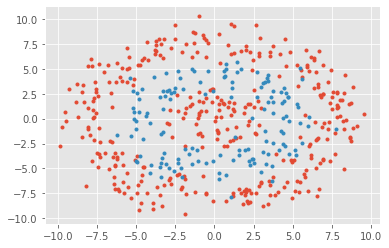

In [59]:
X, y = circ_dist()
plot_classes(X,y)

In [62]:
# scale the values (they already have mean 0, but let's change SD)

X = (X - X.mean(axis = 0))/X.std(axis = 0)

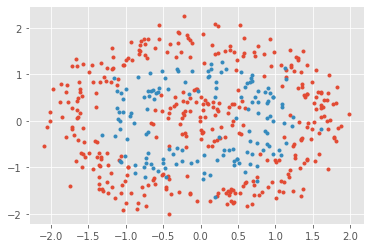

In [64]:
plot_classes(X,y) # it has indeed done so

In [144]:
# define network

"""model = Sequential(
    [Dense(units = 10, input_shape = (2,), activation = 'relu'),
    Dense(units = 200, activation = 'relu'),
     Dense(units = 200, activation = 'relu'),
     Dense(units = 2, activation = 'tanh')
])"""

model = Sequential(
[
    Dense(units = 6, input_shape = (2,), activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
    
]
)
# note, you must either use the model.add feature, or place the layers into a list
# note, your y value that you use for training must be compatible with that of the final
# layer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [145]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y)

In [146]:
model.fit(X,y_train, epochs = 250, batch_size = 32)

Epoch 1/250
16/16 [==============================] - 0s 808us/step - loss: 0.6950 - accuracy: 0.5800
Epoch 2/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6180
Epoch 3/250
16/16 [==============================] - 0s 887us/step - loss: 0.6477 - accuracy: 0.6020
Epoch 4/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6280
Epoch 5/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.7040
Epoch 6/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7140
Epoch 7/250
16/16 [==============================] - 0s 928us/step - loss: 0.6104 - accuracy: 0.7140
Epoch 8/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.7140
Epoch 9/250
16/16 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.7140
Epoch 10/250
16/16 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7140
Epo

16/16 [==============================] - 0s 890us/step - loss: 0.5772 - accuracy: 0.7140
Epoch 83/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7140
Epoch 84/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7140
Epoch 85/250
16/16 [==============================] - 0s 975us/step - loss: 0.5765 - accuracy: 0.7140
Epoch 86/250
16/16 [==============================] - 0s 955us/step - loss: 0.5763 - accuracy: 0.7140
Epoch 87/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.7140
Epoch 88/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7140
Epoch 89/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7140
Epoch 90/250
16/16 [==============================] - 0s 901us/step - loss: 0.5753 - accuracy: 0.7140
Epoch 91/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7140
Epoch

16/16 [==============================] - 0s 951us/step - loss: 0.5460 - accuracy: 0.7140
Epoch 163/250
16/16 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7140
Epoch 164/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7140
Epoch 165/250
16/16 [==============================] - 0s 914us/step - loss: 0.5440 - accuracy: 0.7140
Epoch 166/250
16/16 [==============================] - 0s 961us/step - loss: 0.5433 - accuracy: 0.7140
Epoch 167/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7140
Epoch 168/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7140
Epoch 169/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7140
Epoch 170/250
16/16 [==============================] - 0s 964us/step - loss: 0.5403 - accuracy: 0.7140
Epoch 171/250
16/16 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7

16/16 [==============================] - 0s 957us/step - loss: 0.4670 - accuracy: 0.7200
Epoch 243/250
16/16 [==============================] - 0s 964us/step - loss: 0.4658 - accuracy: 0.7180
Epoch 244/250
16/16 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7120
Epoch 245/250
16/16 [==============================] - 0s 904us/step - loss: 0.4639 - accuracy: 0.7100
Epoch 246/250
16/16 [==============================] - 0s 871us/step - loss: 0.4627 - accuracy: 0.6960
Epoch 247/250
16/16 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.6780
Epoch 248/250
16/16 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.6780
Epoch 249/250
16/16 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.6700
Epoch 250/250
16/16 [==============================] - 0s 947us/step - loss: 0.4577 - accuracy: 0.6540


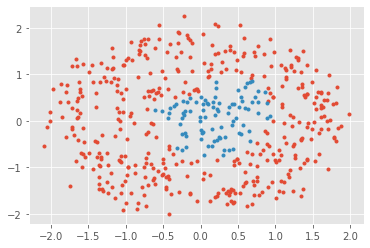

In [147]:

yhat = model.predict(X)
y_plot = yhat[:,1]

y_plot[yhat[:,1] > yhat[:,0]] = 1
y_plot[y_plot != 1] = 0

plot_classes(X,y_plot)

# References